In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile


In [2]:
# 
# basicos
#

def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)


def resize_( img, width, height):
    dim = (width, height)
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 


In [3]:

#
# words
#
words= ['Ba4', 'Ba5', 'Ba7', 'Bb2', 'Bb3', 'Bb4', 'Bb4+', 'Bb5', 'Bb5+', 'Bb7', 'Bc4', 'Bc5', 'Bd2', 'Bd3', 'Bd6', 'Bd7', 'Be2', 'Be3', 'Be5', 'Be6', 'Be7', 'Bf3', 'Bf4', 'Bf5', 'Bg2', 'Bg3', 'Bg4', 'Bg5', 'Bg7', 'Bh4', 'Bh6', 'Bh7', 'Bxb4', 'Bxc3', 'Bxc3+', 'Bxc4', 'Bxc5', 'Bxc6', 'Bxc7', 'Bxd2+', 'Bxd6', 'Bxd7+', 'Bxf6', 'Kd8', 'Kxd8', 'Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nbxd2', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd6+', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Ng5', 'Nge2', 'Nge7', 'Ngf3', 'Ngf6', 'Nh5', 'Nxc6', 'Nxd4', 'Nxd5', 'Nxd7', 'Nxe4', 'Nxe5', 'Nxf6+', 'O-O', 'O-O-O', 'Qa4', 'Qa5', 'Qa5+', 'Qb3', 'Qb6', 'Qc2', 'Qc3', 'Qc7', 'Qd1', 'Qd2', 'Qd3', 'Qd4', 'Qd5', 'Qd6', 'Qd7', 'Qe1', 'Qe2', 'Qe7', 'Qe8', 'Qf3', 'Qf6', 'Qg6', 'Qh4', 'Qxb2', 'Qxb3', 'Qxc4', 'Qxc7', 'Qxd4', 'Qxd5', 'Qxd6', 'Qxd8+', 'Qxe4+', 'Qxf6', 'Rb1', 'Rb8', 'Rc8', 'Re1', 'Re8', 'a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'bxc3', 'bxc6', 'c3', 'c4', 'c5', 'c6', 'cxb3', 'cxd4', 'cxd5', 'cxd6', 'd3', 'd4', 'd5', 'd6', 'dxc3', 'dxc4', 'dxc5', 'dxc6', 'dxe4', 'e3', 'e4', 'e5', 'e6', 'exd4', 'exd5', 'exf6', 'f3', 'f4', 'f5', 'f6', 'g3', 'g5', 'g6', 'gxf6', 'h3', 'h4', 'h5', 'h6']
print( len( words))

175


In [10]:

#
# libs de words
#
def pt_to_pgn( w):
    # R=> K
    # T=> R
    # C=> N
    # B=> B
    # D=> Q

#     print( w, '=> ')
    png= w.replace( 'R', 'K').replace( 'T', 'R').replace( 'C', 'N').replace( 'D', 'Q')
#     print( png)
    return png

def to_pgn( label):
    return [pt_to_pgn( w) for w in label]

def pgn_to_pt( w):
    # R => T
    # K => R
    # N => C
    # Q => D
    
    return w.replace( 'R', 'T').replace( 'K', 'R').replace( 'N', 'C').replace( 'Q', 'D')

def random_label_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            words[random.randrange( 0, len( words))]
        )
    return label

print( 'eng', random_label_from_vocab())    

def random_label_pt_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            pgn_to_pt( words[random.randrange( 0, len( words))])
        )
    return label


print( 'pt', random_label_pt_from_vocab())

eng ['Rc8', 'Be2', 'Bxd2+', 'Bc4', 'Ngf3', 'Na6', 'Kxd8', 'Nh5', 'Bc5', 'Nd6+', 'Qxc4', 'Qxe4+', 'exd4', 'dxc4', 'Na4', 'Nf1']
pt ['g3', 'Cgf3', 'Cbd2', 'Be3', 'Be6', 'Cf6', 'c6', 'Bxd6', 'Dxd8+', 'Bd3', 'Cd6+', 'Dd3', 'c4', 'dxc3', 'Cxe4', 'Dd4']


In [46]:
#
# Parts
#
word_cuts= {}
for w in words:
    word_cuts[w]= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-syn', w, "*.jpg"))

def get_random_cut_for( w):
    f= word_cuts[w][random.randrange( 0, len( word_cuts[w]))]
    return resize_( _load_image( f), 339, 72)

In [47]:
for w in words:
    print( w, len( word_cuts[w]))

d6 145
Bf3 56
Nxc6 50
Bxd6 102
a4 121
a3 122
Nbxd2 240
g5 107
Nxd4 112
Nf3 191
Nh5 68
Qd3 74
cxd4 126
Bg2 122
Nb3 74
Bb3 84
dxc3 170
f6 102
exd4 98
Qa5 99
Ngf6 162
Bd3 134
Qc7 122
Nd2 108
Bg7 134
Qc2 114
e4 189
bxc3 61
Rc8 115
Nge7 91
O-O 294
Bxb4 183
Nfd7 124
h6 121
cxd6 142
dxc4 68
b6 121
Nxd5 102
Qc3 120
Qe7 109
Nb4 46
Qf6 45
Nde2 220
a5 117
Qd6 53
Qd4 116
Bxd7+ 199
c4 164
Kd8 170
Qd5 97
g3 129
Re8 118
Nxf6+ 137
Ba5 166
Bb4+ 156
Bb7 130
Ba4 52
Nc5 106
Be6 120
Bc4 119
Na5 62
Nbd2 98
e6 145
cxd5 117
Bxd2+ 206
b4 128
Bg3 53
cxb3 187
f3 114
Qxb2 167
Bxc3 51
f5 114
Be5 50
Qb3 92
dxe4 95
Qd1 82
Bxf6 101
gxf6 79
Qxc4 125
Kxd8 204
Ngf3 186
d3 127
Qxb3 193
Qb6 111
Bh7 204
Bg5 113
f4 111
Qxd6 87
c3 135
bxc6 51
Qd7 100
Bb4 98
Bh6 64
Nd4 103
a6 134
Qh4 45
b5 130
Bh4 56
Qd2 119
dxc6 122
Qg6 155
Ba7 204
Rb1 82
Bxc5 52
O-O-O 117
h4 111
Be7 142
Bf4 117
d5 178
Qe2 117
Ne4 110
e3 127
Bb5+ 133
Bc5 91
dxc5 75
Qxf6 114
Ne2 89
Nb5 60
Bd6 111
Bxc4 73
d4 200
Nc2 121
Ne5 118
Re1 124
Rb8 104
Na4 49
Ng5 70
Nb

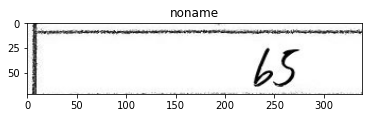

In [109]:
show( get_random_cut_for('b5'))

In [32]:
#
# geracao de uma imagem
#
def resize( img, width, height):
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    return img

def transform_and_resize( folder):
    # pega todas as imagens
    img_files= glob( os.path.join( folder, '*', 'images/*.jpg'))
    print( len( img_files))
                    
    # resize
    for f in img_files[0:1]:
        resize( f, 345, 300)
        
def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( label, folder):    
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild( cuts)
    img= resize( img, 345, 300)
    
    fname= "new-random_"+str( uuid.uuid4())[:8] 
#     print( 'write to ', os.path.join( folder, 'images', fname+ ".jpg"))
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))
    

In [31]:
#
# geracao de dataset
#
def generate_dataset_topX( N, words, dataset_name):
    #N_ratio = (parts,syn)
    
    print( 'gerar total', N, 'parts')
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/'+ dataset_name
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)

    N_train= int( N*0.8)
    for i in range( 0, N):
        if i%100== 0:
            print( i)
        folder= "train" if i< N_train else "valid"
        generate_for_label( random_label_from_vocab(), 
                    os.path.join( root, folder))
        
generate_dataset_topX( 10, words[:10], 'test')

gerar total 10 parts
0
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_1a4ecabb.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_e64e2bff.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_4a51bd0d.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_af6aed73.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_4b6cfb8e.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_7dfa3bce.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_341c341f.jpg
write to  C:/mestrado/datasets/final/datasets/test\train\images\new-random_b9ed6280.jpg
write to  C:/mestrado/datasets/final/datasets/test\valid\images\new-random_5b0abaa5.jpg
write to  C:/mestrado/datasets/final/datasets/test\valid\images\new-random_77eeea9e.jpg


In [40]:
random.shuffle( words)

In [45]:
print( words)

['d6', 'Bf3', 'Nxc6', 'Bxd6', 'a4', 'a3', 'Nbxd2', 'g5', 'Nxd4', 'Nf3', 'Nh5', 'Qd3', 'cxd4', 'Bg2', 'Nb3', 'Bb3', 'dxc3', 'f6', 'exd4', 'Qa5', 'Ngf6', 'Bd3', 'Qc7', 'Nd2', 'Bg7', 'Qc2', 'e4', 'bxc3', 'Rc8', 'Nge7', 'O-O', 'Bxb4', 'Nfd7', 'h6', 'cxd6', 'dxc4', 'b6', 'Nxd5', 'Qc3', 'Qe7', 'Nb4', 'Qf6', 'Nde2', 'a5', 'Qd6', 'Qd4', 'Bxd7+', 'c4', 'Kd8', 'Qd5', 'g3', 'Re8', 'Nxf6+', 'Ba5', 'Bb4+', 'Bb7', 'Ba4', 'Nc5', 'Be6', 'Bc4', 'Na5', 'Nbd2', 'e6', 'cxd5', 'Bxd2+', 'b4', 'Bg3', 'cxb3', 'f3', 'Qxb2', 'Bxc3', 'f5', 'Be5', 'Qb3', 'dxe4', 'Qd1', 'Bxf6', 'gxf6', 'Qxc4', 'Kxd8', 'Ngf3', 'd3', 'Qxb3', 'Qb6', 'Bh7', 'Bg5', 'f4', 'Qxd6', 'c3', 'bxc6', 'Qd7', 'Bb4', 'Bh6', 'Nd4', 'a6', 'Qh4', 'b5', 'Bh4', 'Qd2', 'dxc6', 'Qg6', 'Ba7', 'Rb1', 'Bxc5', 'O-O-O', 'h4', 'Be7', 'Bf4', 'd5', 'Qe2', 'Ne4', 'e3', 'Bb5+', 'Bc5', 'dxc5', 'Qxf6', 'Ne2', 'Nb5', 'Bd6', 'Bxc4', 'd4', 'Nc2', 'Ne5', 'Re1', 'Rb8', 'Na4', 'Ng5', 'Nb6', 'Nc6', 'Bxc3+', 'Be2', 'e5', 'Ndb5', 'Bg4', 'Nd5', 'Qxe4+', 'Ne7', 'Nd6+', 'Nxe5'

In [57]:
for top in [20, 40, 60, 80, 100, 120, 140, 180]:
#     print( words[:top])
    generate_dataset_topX( 10000, words[:top], 'nnv-rand-8lines-v16--syn-10k--top'+ str(top))

gerar total 10000 parts
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
gerar total 10000 parts
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9

In [ ]:
for top in [20, 40, 60, 80, 100, 120, 140, 180]:
#     print( words[:top])
    generate_dataset_topX( 10000, words[:top], 'nnv-rand-8lines-v16--syn-10k--top'+ str(top))

In [86]:
#
# distorcoes
#
def sp_noise(npimage,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(npimage.shape,np.uint8)
    thres = 1 - prob 
    for i in range(npimage.shape[0]):
        for j in range(npimage.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = random.randint( 0, 128)
            else:
                output[i][j] = npimage[i][j]
    return output

def sp_noise_pil( pilimg, prob):
#     print( 'noise', prob)
    img= pilimg
    img= np.asarray( img)
    img= sp_noise(img, prob)
    img= PIL.Image.fromarray( img)
    return img

def distorce( img):
    # ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))
#     print( 'distorce')
    if type( img)== PIL.Image.Image:
        img= np.asarray( img)
        img= elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
        img= PIL.Image.fromarray( img)
        return img
    else:
        return elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
    

# Rotate the foreground
def rotate( pilimg):
#     print( 'rotate')
    foreground= pilimg
    angle_degrees = random.uniform(-1.5,1.5)
#     print( angle_degrees)
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True, fillcolor = (255,255,255))

    # Scale the foreground
#     scale = random.random() * .5 + .5 # Pick something between .5 and 1
#     scale = 1
#     new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
#     foreground = foreground.resize(new_size, resample=Image.BICUBIC)
    return foreground
#     show( foreground)
    

def random_transform( pilimg, p):
    img= pilimg
    if( random.random()< 0.8):
        img= rotate( img)
#     if( random.random()< 0.1):
#         img= distorce( img)
    if( random.random()< 0.20):
        img= sp_noise_pil( img, random.uniform( 0.001, 0.0001))
    
    return img

In [111]:
def transform_file( f):
    img= Image.open( f)
    img= random_transform( img, None)
#     show( img)
    img.save( f)
    
def resize( path, width, height):
    img= cv2.imread( path)
#     show( img)
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
#     show( img)
    cv2.imwrite( path, img)    

def transform_and_resize( folder):
    # pega todas as imagens
    img_files= glob( os.path.join( folder, '*', 'images/*.jpg'))
    print( len( img_files))
                    
    # resize
    for i in range( 0, len( img_files)):
        f= img_files[i]
        if i%100== 0:
            print( i)
        resize( f, 345, 300)
#         transform_file( f)
    
    
transform_and_resize( r'C:\mestrado\datasets\final\datasets\new-random-8lines--v18--mix--16k')

18010
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000


In [ ]:
for top in [20]:
#     print( words[:top])
    generate_dataset_topX( 10000, words[:top], 'nnv-rand-8lines-v16--syn-10k--top'+ str(top))